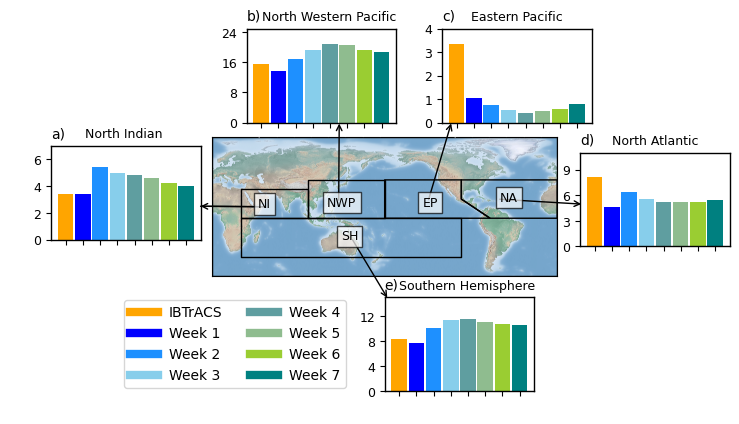

In [1]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np  
import warnings
warnings.filterwarnings('ignore')

csv_file_path = 'Data_TC/Proc/Landing_climatology.csv' 
data = pd.read_csv(csv_file_path)
categories = ['IBTrACS', 'week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7']
basins_of_interest = ['WP', 'EP', 'NA_b', 'NI', 'SH']

filtered_data = data[data['Basin'].isin(basins_of_interest)]
values_WP = filtered_data.loc[filtered_data['Basin'] == 'WP', categories].values.flatten()
values_EP = filtered_data.loc[filtered_data['Basin'] == 'EP', categories].values.flatten()
values_NA = filtered_data.loc[filtered_data['Basin'] == 'NA_b', categories].values.flatten()
values_NI = filtered_data.loc[filtered_data['Basin'] == 'NI', categories].values.flatten()
values_SH = filtered_data.loc[filtered_data['Basin'] == 'SH', categories].values.flatten()

fig = plt.figure(figsize=(11.5, 6.7))
map_ax = fig.add_axes([0.35, 0.35, 0.3, 0.3], facecolor='none')
m = Basemap(projection='cyl',
             llcrnrlat=-60, urcrnrlat=85,
             llcrnrlon=0, urcrnrlon=360,  
             resolution='l', ax=map_ax)

map_boundary = plt.Rectangle((0, -60), 360, 145, linewidth=1, edgecolor='black', facecolor='none', zorder=5)
map_ax.add_patch(map_boundary)

color_obs = 'orange'  
colors_weeks = ['orange', 'blue', 'dodgerblue', 'skyblue', 'cadetblue', 'darkseagreen', 'yellowgreen', 'teal']  

polygon_coords1 = np.array([[30, 0], [100, 0], [100, 30], [30, 30], [30, 0]])  
polygon_coords2 = np.array([[100, 0], [180, 0], [180, 40], [100, 40], [100, 0]])  
polygon_coords3 = np.array([[180, 0], [290, 0], [260, 20], [260, 40], [180, 40], [180, 0]])  
polygon_coords4 = np.array([[290, 0], [260, 20], [260, 40], [260, 40], [360, 40], [360, 0], [290, 0]])  
polygon_coords5 = np.array([[30, 0], [30, -40], [260, -40], [260, 0]])  

x1, y1 = m(polygon_coords1[:, 0], polygon_coords1[:, 1])
x2, y2 = m(polygon_coords2[:, 0], polygon_coords2[:, 1])
x3, y3 = m(polygon_coords3[:, 0], polygon_coords3[:, 1])
x4, y4 = m(polygon_coords4[:, 0], polygon_coords4[:, 1])
x5, y5 = m(polygon_coords5[:, 0], polygon_coords5[:, 1])

from matplotlib.collections import PolyCollection

polygons = [
    [list(zip(x1, y1))],
    [list(zip(x2, y2))],
    [list(zip(x3, y3))],
    [list(zip(x4, y4))],
    [list(zip(x5, y5))]
]

polygon_colors = ['none', 'none', 'none', 'none', 'none']

for poly, color in zip(polygons, polygon_colors):
    pc = PolyCollection(poly, facecolor=color, edgecolor='black', linewidth=1, alpha=1)
    map_ax.add_collection(pc)


ax_ni = fig.add_axes([0.21, 0.45, 0.13, 0.14], facecolor='none')  
ax_wp = fig.add_axes([0.38, 0.625, 0.13, 0.14], facecolor='none')   
ax_ep = fig.add_axes([0.55, 0.625, 0.13, 0.14], facecolor='none') 
ax_na = fig.add_axes([0.67, 0.44, 0.13, 0.14], facecolor='none')   
ax_sh = fig.add_axes([0.5, 0.224, 0.13, 0.14], facecolor='none')  

ax_ep.bar(categories, values_EP, color=[color_obs] + colors_weeks[1:], width=0.9, label=['IBTrACS'] + categories[1:])
ax_na.bar(categories, values_NA, color=[color_obs] + colors_weeks[1:], width=0.9, label=['IBTrACS'] + categories[1:])
ax_ni.bar(categories, values_NI, color=[color_obs] + colors_weeks[1:], width=0.9, label=['IBTrACS'] + categories[1:])
ax_wp.bar(categories, values_WP, color=[color_obs] + colors_weeks[1:], width=0.9, label=['IBTrACS'] + categories[1:])
ax_sh.bar(categories, values_SH, color=[color_obs] + colors_weeks[1:], width=0.9, label=['IBTrACS'] + categories[1:])

ax_ep.set_ylim(0, 4)
ax_na.set_ylim(0, 11)
ax_ni.set_ylim(0, 7)
ax_wp.set_ylim(0, 25)
ax_sh.set_ylim(0, 15)

ax_ep.set_title('Eastern Pacific', fontsize=9, bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})
ax_na.set_title('North Atlantic', fontsize=9, bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})
ax_ni.set_title('North Indian ', fontsize=9, bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})
ax_wp.set_title('    North Western Pacific', fontsize=9, bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})
ax_sh.set_title('    Southern Hemisphere', fontsize=9, bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})

ax_ni.set_title('a)', fontsize=10, loc='left', bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})
ax_wp.set_title('b)', fontsize=10, loc='left', bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})
ax_ep.set_title('c)', fontsize=10, loc='left', bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})
ax_na.set_title('d)', fontsize=10, loc='left', bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})
ax_sh.set_title('e)', fontsize=10, loc='left', bbox={'facecolor': 'none', 'edgecolor': 'none', 'alpha': 1, 'pad': 4})

axes_list = [ax_ep, ax_na, ax_ni, ax_wp, ax_sh]
for ax in axes_list:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    for _, spine in ax.spines.items():
        spine.set_linewidth(1)
    ax.tick_params(axis='x', labelsize=0, color='k', labelcolor='white', rotation=55)
    ax.tick_params(axis='y', labelsize=9, color='k', labelcolor='k', rotation=0)

polygon_ni_coords = [np.mean(x1), np.mean(y1)] 
barplot_ni_coords = [0.172, 0.325]  

map_ax.annotate(
    '',  
    xy=barplot_ni_coords,  
    xycoords='figure fraction',  
    xytext=polygon_ni_coords,  
    textcoords='data',  
    arrowprops=dict(arrowstyle="->", color='black', lw=1)  
)


polygon_wp_coords = [np.mean(x2), np.mean(y2)]  
barplot_wp_coords = [0.295, 0.4526]  

map_ax.annotate(
    '', 
    xy=barplot_wp_coords, 
    xycoords='figure fraction',  
    xytext=polygon_wp_coords,  
    textcoords='data',  
    arrowprops=dict(arrowstyle="->", color='black', lw=1)  
)


polygon_ep_coords = [np.mean(x3), np.mean(y3)]  
barplot_ep_coords = [0.393, 0.4526]  

map_ax.annotate(
    '',  
    xy=barplot_ep_coords,  
    xycoords='figure fraction', 
    xytext=polygon_ep_coords, 
    textcoords='data', 
    arrowprops=dict(arrowstyle="->", color='black', lw=1) 
)

polygon_na_coords = [np.mean(x4), np.mean(y4)]  
barplot_na_coords = [0.5078, 0.328]  

map_ax.annotate(
    '',  
    xy=barplot_na_coords,  
    xycoords='figure fraction', 
    xytext=polygon_na_coords, 
    textcoords='data',  
    arrowprops=dict(arrowstyle="->", color='black', lw=1)  
)

polygon_sh_coords = [np.mean(x5), np.mean(y5)] 
barplot_sh_coords = [0.338, 0.185]  


map_ax.annotate(
    '',  
    xy=barplot_sh_coords, 
    xycoords='figure fraction',  
    xytext=polygon_sh_coords, 
    textcoords='data',  
    arrowprops=dict(arrowstyle="->", color='black', lw=1) 
)

map_ax.annotate('', xy=barplot_ni_coords, xytext=(polygon_ni_coords[0], polygon_ni_coords[1]),
                xycoords='figure fraction', textcoords='data',
                arrowprops=dict(arrowstyle='-', color='black', lw=1))

legend_handles = [
    plt.Line2D([0], [0], color=color_obs, lw=6, label='IBTrACS'),
    plt.Line2D([0], [0], color=colors_weeks[1], lw=6, label='Week 1'),
    plt.Line2D([0], [0], color=colors_weeks[2], lw=6, label='Week 2'),
    plt.Line2D([0], [0], color=colors_weeks[3], lw=6, label='Week 3'),
    plt.Line2D([0], [0], color=colors_weeks[4], lw=6, label='Week 4'),
    plt.Line2D([0], [0], color=colors_weeks[5], lw=6, label='Week 5'),
    plt.Line2D([0], [0], color=colors_weeks[6], lw=6, label='Week 6'),
    plt.Line2D([0], [0], color=colors_weeks[7], lw=6, label='Week 7'),
]
fig.text(0.39, 0.498, 'NI',fontsize='9',bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 3})
fig.text(0.45, 0.5, 'NWP',fontsize='9',bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 3})
fig.text(0.533, 0.5, 'EP',fontsize='9',bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 3})
fig.text(0.6, 0.508, 'NA',fontsize='9',bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 3})
fig.text(0.462, 0.45, 'SH',fontsize='9',bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 3})

for ax in axes_list:
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4)) 

x_position = -1  
y_position = 0.5  

plt.legend(handles=legend_handles, ncol=2, bbox_to_anchor=(x_position, y_position), fontsize=10, loc='center')
m.shadedrelief()
fig.tight_layout()

# Save the figure
#plt.savefig('Figures/Figure11_landing_TCs.png', dpi=400, bbox_inches='tight')

plt.show()
